In [32]:
library(dplyr)
bodyPerformance <- read.csv('../../Data/프로젝트/bodyPerformance.csv')
bodyPerformance$성별<-ifelse(bodyPerformance$성별=='M',0,1)

In [33]:
head(bodyPerformance)
nrow(bodyPerformance)

나이,성별,키_cm,몸무게_kg,체지방율,이완기혈압_min,수축기혈압_분,악력,앉아서앞으로구부리기_cm,윗몸일으키기,멀리뛰기,등급
27,0,172.3,75.24,21.3,80,130,54.9,18.4,60,217,C
25,0,165.0,55.80,15.7,77,126,36.4,16.3,53,229,A
31,0,179.6,78.00,20.1,92,152,44.8,12.0,49,181,C
32,0,174.5,71.10,18.4,76,147,41.4,15.2,53,219,B
28,0,173.8,67.70,17.1,70,127,43.5,27.1,45,217,B
36,1,165.4,55.40,22.0,64,119,23.8,21.0,27,153,B


[1] 13393

In [34]:
str(bodyPerformance)

'data.frame':	13393 obs. of  12 variables:
 $ 나이                   : int  27 25 31 32 28 36 42 33 54 28 ...
 $ 성별                   : num  0 0 0 0 0 1 1 0 0 0 ...
 $ 키_cm                  : num  172 165 180 174 174 ...
 $ 몸무게_kg              : num  75.2 55.8 78 71.1 67.7 ...
 $ 체지방율               : num  21.3 15.7 20.1 18.4 17.1 22 32.2 36.9 27.6 14.4 ...
 $ 이완기혈압_min         : num  80 77 92 76 70 64 72 84 85 81 ...
 $ 수축기혈압_분          : num  130 126 152 147 127 119 135 137 165 156 ...
 $ 악력                   : num  54.9 36.4 44.8 41.4 43.5 23.8 22.7 45.9 40.4 57.9 ...
 $ 앉아서앞으로구부리기_cm: num  18.4 16.3 12 15.2 27.1 21 0.8 12.3 18.6 12.1 ...
 $ 윗몸일으키기           : num  60 53 49 53 45 27 18 42 34 55 ...
 $ 멀리뛰기               : num  217 229 181 219 217 153 146 234 148 213 ...
 $ 등급                   : Factor w/ 4 levels "A","B","C","D": 3 1 3 2 2 2 4 2 3 2 ...


In [35]:
summary(bodyPerformance)

      나이            성별            키_cm         몸무게_kg     
 Min.   :21.00   Min.   :0.0000   Min.   :125.0   Min.   : 26.30  
 1st Qu.:25.00   1st Qu.:0.0000   1st Qu.:162.4   1st Qu.: 58.20  
 Median :32.00   Median :0.0000   Median :169.2   Median : 67.40  
 Mean   :36.78   Mean   :0.3678   Mean   :168.6   Mean   : 67.45  
 3rd Qu.:48.00   3rd Qu.:1.0000   3rd Qu.:174.8   3rd Qu.: 75.30  
 Max.   :64.00   Max.   :1.0000   Max.   :193.8   Max.   :138.10  
    체지방율     이완기혈압_min  수축기혈압_분        악력      
 Min.   : 3.00   Min.   :  0.0   Min.   :  0.0   Min.   : 0.00  
 1st Qu.:18.00   1st Qu.: 71.0   1st Qu.:120.0   1st Qu.:27.50  
 Median :22.80   Median : 79.0   Median :130.0   Median :37.90  
 Mean   :23.24   Mean   : 78.8   Mean   :130.2   Mean   :36.96  
 3rd Qu.:28.00   3rd Qu.: 86.0   3rd Qu.:141.0   3rd Qu.:45.20  
 Max.   :78.40   Max.   :156.2   Max.   :201.0   Max.   :70.50  
 앉아서앞으로구부리기_cm  윗몸일으키기      멀리뛰기     등급    
 Min.   :-25.00          Min.   : 0.00   Min.   :  0.0   

In [36]:
bodyPerformance$bmi <- round(bodyPerformance$몸무게_kg / (bodyPerformance$키_cm * bodyPerformance$키_cm / 10000),1)
head(bodyPerformance)

나이,성별,키_cm,몸무게_kg,체지방율,이완기혈압_min,수축기혈압_분,악력,앉아서앞으로구부리기_cm,윗몸일으키기,멀리뛰기,등급,bmi
27,0,172.3,75.24,21.3,80,130,54.9,18.4,60,217,C,25.3
25,0,165.0,55.80,15.7,77,126,36.4,16.3,53,229,A,20.5
31,0,179.6,78.00,20.1,92,152,44.8,12.0,49,181,C,24.2
32,0,174.5,71.10,18.4,76,147,41.4,15.2,53,219,B,23.3
28,0,173.8,67.70,17.1,70,127,43.5,27.1,45,217,B,22.4
36,1,165.4,55.40,22.0,64,119,23.8,21.0,27,153,B,20.3


In [37]:
bodyPerformance$체지방율 <- ifelse(bodyPerformance$체지방율 <18.5,'1',
                  ifelse(bodyPerformance$체지방율 >= 18.5 & bodyPerformance$체지방율 <=22.9 ,'2',
                  ifelse(bodyPerformance$체지방율 >=23 & bodyPerformance$체지방율 <=24.9,'3',
                  ifelse(bodyPerformance$체지방율 >=25 & bodyPerformance$체지방율 <=29.9,'4',
                  ifelse(bodyPerformance$체지방율 >=30 & bodyPerformance$체지방율 <=34.9,'5','6'
                  )))))

In [39]:
bodyPerformance$체지방율 <- as.numeric(bodyPerformance$체지방율)
str(bodyPerformance)

'data.frame':	13393 obs. of  13 variables:
 $ 나이                   : int  27 25 31 32 28 36 42 33 54 28 ...
 $ 성별                   : num  0 0 0 0 0 1 1 0 0 0 ...
 $ 키_cm                  : num  172 165 180 174 174 ...
 $ 몸무게_kg              : num  75.2 55.8 78 71.1 67.7 ...
 $ 체지방율               : num  2 1 2 1 1 2 5 6 4 1 ...
 $ 이완기혈압_min         : num  80 77 92 76 70 64 72 84 85 81 ...
 $ 수축기혈압_분          : num  130 126 152 147 127 119 135 137 165 156 ...
 $ 악력                   : num  54.9 36.4 44.8 41.4 43.5 23.8 22.7 45.9 40.4 57.9 ...
 $ 앉아서앞으로구부리기_cm: num  18.4 16.3 12 15.2 27.1 21 0.8 12.3 18.6 12.1 ...
 $ 윗몸일으키기           : num  60 53 49 53 45 27 18 42 34 55 ...
 $ 멀리뛰기               : num  217 229 181 219 217 153 146 234 148 213 ...
 $ 등급                   : Factor w/ 4 levels "A","B","C","D": 3 1 3 2 2 2 4 2 3 2 ...
 $ bmi                    : chr  "4" "2" "3" "3" ...


In [41]:
head(bodyPerformance)


나이,성별,키_cm,몸무게_kg,체지방율,이완기혈압_min,수축기혈압_분,악력,앉아서앞으로구부리기_cm,윗몸일으키기,멀리뛰기,등급,bmi
27,0,172.3,75.24,2,80,130,54.9,18.4,60,217,C,4
25,0,165.0,55.80,1,77,126,36.4,16.3,53,229,A,2
31,0,179.6,78.00,2,92,152,44.8,12.0,49,181,C,3
32,0,174.5,71.10,1,76,147,41.4,15.2,53,219,B,3
28,0,173.8,67.70,1,70,127,43.5,27.1,45,217,B,2
36,1,165.4,55.40,2,64,119,23.8,21.0,27,153,B,2


In [42]:
체지방율 <- bodyPerformance[,c(5,12)]
체지방율 <- arrange(체지방율,등급)


In [43]:
등급별체지방율<- table(체지방율$체지방율, 체지방율$등급)

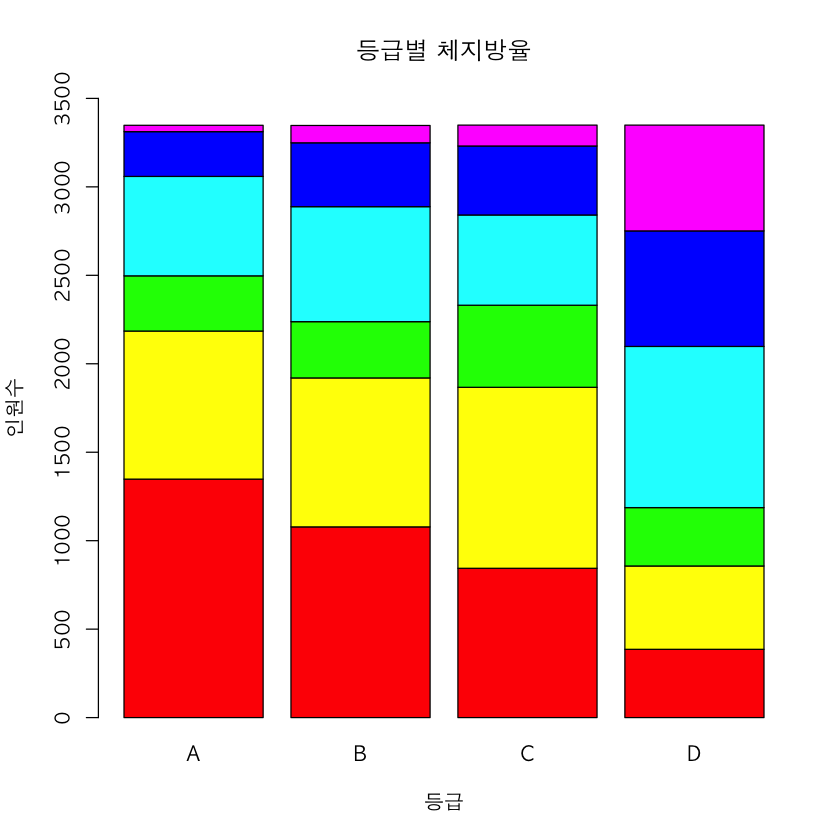

In [44]:
par(family ="AppleGothic")
options(warn= -1)
barplot(등급별체지방율,
       ylim= c(0,3500),
       main = "등급별 체지방율",
       xlab = "등급",
       ylab = "인원수",
       col = rainbow(6)
       )